CIFAR10 是另外一個 dataset， 和 mnist 一樣，有十種類別（飛機、汽車、鳥、貓、鹿、狗、青蛙、馬、船、卡車）

https://www.cs.toronto.edu/~kriz/cifar.html


In [1]:
import keras
from keras.models import Sequential
from PIL import Image
import numpy as np
import tarfile


Using TensorFlow backend.


In [2]:
# 讀取 dataset
# 只有 train 和 test 沒有 validation
import pickle
train_X=[]
train_y=[]
tar_gz = "../Week06/cifar-10-python.tar.gz"
with tarfile.open(tar_gz) as tarf:
    for i in range(1, 6):
        dataset = "cifar-10-batches-py/data_batch_%d"%i
        print("load",dataset)
        with tarf.extractfile(dataset) as f:
            result = pickle.load(f, encoding='latin1')
        train_X.extend(result['data']/255)
        train_y.extend(result['labels'])
    train_X=np.float32(train_X)
    train_y=np.int32(train_y)
    dataset = "cifar-10-batches-py/test_batch"
    print("load",dataset)
    with tarf.extractfile(dataset) as f:
        result = pickle.load(f, encoding='latin1')
        test_X=np.float32(result['data']/255)
        test_y=np.int32(result['labels'])
train_Y = np.eye(10)[train_y]
test_Y = np.eye(10)[test_y]
validation_data = (test_X[:1000], test_Y[:1000])
test_data = (test_X[1000:], test_Y[1000:])


load cifar-10-batches-py/data_batch_1
load cifar-10-batches-py/data_batch_2
load cifar-10-batches-py/data_batch_3
load cifar-10-batches-py/data_batch_4
load cifar-10-batches-py/data_batch_5
load cifar-10-batches-py/test_batch


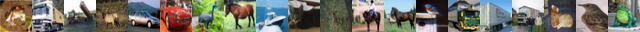

[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6]
['青蛙' '卡車' '卡車' '鹿' '汽車' '汽車' '鳥' '馬' '船' '貓' '鹿' '馬' '馬' '鳥' '卡車' '卡車'
 '卡車' '貓' '鳥' '青蛙']


In [3]:
from IPython.display import display
def showX(X):
    int_X = (X*255).clip(0,255).astype('uint8')
    # N*3072 -> N*3*32*32 -> 32 * 32N * 3
    int_X_reshape = np.moveaxis(int_X.reshape(-1,3,32,32), 1, 3)
    int_X_reshape = int_X_reshape.swapaxes(0,1).reshape(32,-1, 3)
    display(Image.fromarray(int_X_reshape))
# 訓練資料， X 的前 20 筆
showX(train_X[:20])
print(train_y[:20])
name_array = np.array("飛機、汽車、鳥、貓、鹿、狗、青蛙、馬、船、卡車".split('、'))
print(name_array[train_y[:20]])

將之前的 cnn model 套用過來看看

In [4]:
# %load ../Week06/q_cifar10_cnn.py
import keras
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape
model = Sequential()
model.add(Reshape((3, 32, 32), input_shape=(3*32*32,) ))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu", data_format='channels_first'))
model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation="relu", data_format='channels_first'))
model.add(MaxPool2D())
model.add(Reshape((-1,)))
model.add(Dense(units=1024, activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_X, train_Y, validation_data=validation_data, batch_size=100, epochs=10)
rtn = model.evaluate(*test_data)
print("\ntest accuracy=", rtn[1])

Train on 50000 samples, validate on 1000 samples
Epoch 1/10
50000/50000 [==============================] - 21s - loss: 1.5073 - acc: 0.4609 - val_loss: 1.2153 - val_acc: 0.5720
Epoch 2/10
50000/50000 [==============================] - 19s - loss: 1.0979 - acc: 0.6102 - val_loss: 1.0003 - val_acc: 0.6350
Epoch 3/10
50000/50000 [==============================] - 19s - loss: 0.9107 - acc: 0.6794 - val_loss: 0.9248 - val_acc: 0.6630
Epoch 4/10
50000/50000 [==============================] - 19s - loss: 0.7674 - acc: 0.7314 - val_loss: 0.8943 - val_acc: 0.6900
Epoch 5/10
50000/50000 [==============================] - 19s - loss: 0.6320 - acc: 0.7805 - val_loss: 0.8766 - val_acc: 0.6940
Epoch 6/10
50000/50000 [==============================] - 19s - loss: 0.4970 - acc: 0.8274 - val_loss: 0.9347 - val_acc: 0.6880
Epoch 7/10
50000/50000 [==============================] - 19s - loss: 0.3600 - acc: 0.8763 - val_loss: 0.9964 - val_acc: 0.6850
Epoch 8/10
50000/50000 [==============================]

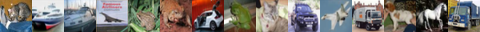

['貓' '汽車' '飛機' '飛機' '青蛙' '青蛙' '汽車' '鳥' '貓' '汽車' '貓' '卡車' '鳥' '馬' '卡車']
['貓' '船' '船' '飛機' '青蛙' '青蛙' '汽車' '青蛙' '貓' '汽車' '飛機' '卡車' '狗' '馬' '卡車']


In [5]:
showX(test_X[:15])
predict_y = model.predict_classes(test_X[:15], verbose=False)
print(name_array[predict_y])
print(name_array[test_y[:15]])

In [6]:
import keras
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape, Dropout
model = Sequential()
model.add(Reshape((3, 32, 32), input_shape=(3*32*32,) ))
model.add(Conv2D(32, 3, padding='same', activation="relu", data_format='channels_first'))
model.add(MaxPool2D())
model.add(Conv2D(64, 3, padding='same', activation="relu", data_format='channels_first'))
model.add(MaxPool2D())
model.add(Reshape((-1,)))
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(rate=0.4))
model.add(Dense(units=10, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_X, train_Y, validation_data=validation_data, batch_size=100, epochs=10)
rtn = model.evaluate(*test_data)
print("\ntest accuracy=", rtn[1])

Train on 50000 samples, validate on 1000 samples
Epoch 1/10
50000/50000 [==============================] - 29s - loss: 1.5101 - acc: 0.4566 - val_loss: 1.2131 - val_acc: 0.5510
Epoch 2/10
50000/50000 [==============================] - 28s - loss: 1.1424 - acc: 0.5938 - val_loss: 1.0331 - val_acc: 0.6420
Epoch 3/10
50000/50000 [==============================] - 29s - loss: 0.9835 - acc: 0.6518 - val_loss: 0.9500 - val_acc: 0.6670
Epoch 4/10
50000/50000 [==============================] - 20s - loss: 0.8547 - acc: 0.6977 - val_loss: 0.8837 - val_acc: 0.6850
Epoch 5/10
50000/50000 [==============================] - 19s - loss: 0.7475 - acc: 0.7369 - val_loss: 0.8432 - val_acc: 0.7010
Epoch 6/10
50000/50000 [==============================] - 19s - loss: 0.6412 - acc: 0.7723 - val_loss: 0.8798 - val_acc: 0.6880
Epoch 7/10
50000/50000 [==============================] - 19s - loss: 0.5418 - acc: 0.8087 - val_loss: 0.8449 - val_acc: 0.7030
Epoch 8/10
50000/50000 [==============================]

In [7]:
model.fit(train_X, train_Y, validation_data=validation_data, batch_size=100, epochs=10)
rtn = model.evaluate(*test_data)
print("\ntest accuracy=", rtn[1])

Train on 50000 samples, validate on 1000 samples
Epoch 1/10
50000/50000 [==============================] - 19s - loss: 0.2504 - acc: 0.9149 - val_loss: 1.0555 - val_acc: 0.7100
Epoch 2/10
50000/50000 [==============================] - 19s - loss: 0.2059 - acc: 0.9283 - val_loss: 1.0203 - val_acc: 0.7090
Epoch 3/10
50000/50000 [==============================] - 19s - loss: 0.1726 - acc: 0.9415 - val_loss: 1.1048 - val_acc: 0.7000
Epoch 4/10
50000/50000 [==============================] - 19s - loss: 0.1542 - acc: 0.9465 - val_loss: 1.1567 - val_acc: 0.7000
Epoch 5/10
50000/50000 [==============================] - 19s - loss: 0.1387 - acc: 0.9524 - val_loss: 1.2201 - val_acc: 0.6980
Epoch 6/10
50000/50000 [==============================] - 19s - loss: 0.1261 - acc: 0.9572 - val_loss: 1.2735 - val_acc: 0.7040
Epoch 7/10
50000/50000 [==============================] - 19s - loss: 0.1148 - acc: 0.9609 - val_loss: 1.2635 - val_acc: 0.6950
Epoch 8/10
50000/50000 [==============================]

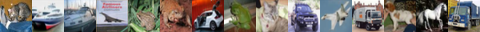

['貓' '船' '船' '飛機' '青蛙' '青蛙' '汽車' '青蛙' '貓' '卡車' '飛機' '卡車' '鳥' '馬' '卡車']
['貓' '船' '船' '飛機' '青蛙' '青蛙' '汽車' '青蛙' '貓' '汽車' '飛機' '卡車' '狗' '馬' '卡車']


In [8]:
showX(test_X[:15])
predict_y = model.predict_classes(test_X[:15], verbose=False)
print(name_array[predict_y])
print(name_array[test_y[:15]])

不同的 activation
https://keras.io/activations/

In [4]:
# 先定義一個工具
def add_layers(model, *layers):
    for l in layers:
        model.add(l)

In [10]:
import keras
from keras.engine.topology import Layer
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape, Dropout

def MyConv2D(filters, kernel_size, **kwargs):
    return (Conv2D(filters=filters, kernel_size=kernel_size, 
                   padding='same',  data_format='channels_first', **kwargs),
            Activation("elu"))
model = Sequential()
add_layers( model,
    Reshape((3, 32, 32), input_shape=(3*32*32,)),
    *MyConv2D(32, 3),
    MaxPool2D(),
    *MyConv2D(64, 3),
    MaxPool2D(),
    Reshape((-1,)),
    Dense(units=1024, activation="elu"),
    Dropout(rate=0.4),
    Dense(units=10, activation="softmax")
)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_X, train_Y, validation_data=validation_data, batch_size=100, epochs=10)
rtn = model.evaluate(*test_data)
print("\ntest accuracy=", rtn[1])

Train on 50000 samples, validate on 1000 samples
Epoch 1/10
50000/50000 [==============================] - 19s - loss: 1.4263 - acc: 0.5103 - val_loss: 1.0930 - val_acc: 0.6240
Epoch 2/10
50000/50000 [==============================] - 19s - loss: 1.0308 - acc: 0.6406 - val_loss: 0.9959 - val_acc: 0.6400
Epoch 3/10
50000/50000 [==============================] - 18s - loss: 0.9083 - acc: 0.6827 - val_loss: 0.9100 - val_acc: 0.6790
Epoch 4/10
50000/50000 [==============================] - 18s - loss: 0.8233 - acc: 0.7120 - val_loss: 0.9503 - val_acc: 0.6750
Epoch 5/10
50000/50000 [==============================] - 19s - loss: 0.7499 - acc: 0.7368 - val_loss: 0.9357 - val_acc: 0.6810
Epoch 6/10
50000/50000 [==============================] - 18s - loss: 0.6773 - acc: 0.7627 - val_loss: 0.9786 - val_acc: 0.6790
Epoch 7/10
50000/50000 [==============================] - 19s - loss: 0.6140 - acc: 0.7839 - val_loss: 1.0009 - val_acc: 0.6740
Epoch 8/10
50000/50000 [==============================]

In [11]:
import keras
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape, Dropout, BatchNormalization
# 先處理資料

#GCN
train_X_mean = np.mean(train_X, axis=0, keepdims=True)
train_X_std = np.std(train_X, axis=0, keepdims=True)
preprocessed_train_X = (train_X-train_X_mean)/train_X_std
preprocessed_test_X = (test_X-train_X_mean)/train_X_std
preprocessed_validation_data = (preprocessed_test_X[:1000], test_Y[:1000])
preprocessed_test_data = (preprocessed_test_X[1000:], test_Y[1000:])


def MyConv2D(filters, kernel_size, **kwargs):
    return (Conv2D(filters=filters, kernel_size=kernel_size, 
                   padding='same',  data_format='channels_first', **kwargs),
            Activation("relu"))
def add_layers(model, *layers):
    for l in layers:
        model.add(l)
model = Sequential()
add_layers( model,
    Reshape((3, 32, 32), input_shape=(3*32*32,)),
    *MyConv2D(32, 3),
    MaxPool2D(),
    *MyConv2D(64, 3),
    MaxPool2D(),
    Reshape((-1,)),
    Dense(units=1024, activation="relu"),
    Dropout(rate=0.4),
    Dense(units=10, activation="softmax")
)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(preprocessed_train_X, train_Y, validation_data=preprocessed_validation_data, 
          batch_size=100, epochs=10)
rtn = model.evaluate(*preprocessed_test_data)
print("\ntest accuracy=", rtn[1])

Train on 50000 samples, validate on 1000 samples
Epoch 1/10
50000/50000 [==============================] - 19s - loss: 1.5286 - acc: 0.4543 - val_loss: 1.1498 - val_acc: 0.6020
Epoch 2/10
50000/50000 [==============================] - 19s - loss: 1.0738 - acc: 0.6200 - val_loss: 1.0352 - val_acc: 0.6340
Epoch 3/10
50000/50000 [==============================] - 19s - loss: 0.8797 - acc: 0.6888 - val_loss: 0.9085 - val_acc: 0.6720
Epoch 4/10
50000/50000 [==============================] - 18s - loss: 0.7187 - acc: 0.7481 - val_loss: 0.8152 - val_acc: 0.7040
Epoch 5/10
50000/50000 [==============================] - 19s - loss: 0.5719 - acc: 0.7980 - val_loss: 0.8395 - val_acc: 0.7110
Epoch 6/10
50000/50000 [==============================] - 19s - loss: 0.4424 - acc: 0.8460 - val_loss: 0.8739 - val_acc: 0.7140
Epoch 7/10
50000/50000 [==============================] - 18s - loss: 0.3275 - acc: 0.8860 - val_loss: 0.9208 - val_acc: 0.7170
Epoch 8/10
50000/50000 [==============================]

In [12]:
import keras
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape, Dropout, BatchNormalization
# 先處理資料

#GCN
train_X_mean = np.mean(train_X, axis=0, keepdims=True)
train_X_std = np.std(train_X, axis=0, keepdims=True)
preprocessed_train_X = (train_X-train_X_mean)/train_X_std
preprocessed_test_X = (test_X-train_X_mean)/train_X_std
preprocessed_validation_data = (preprocessed_test_X[:1000], test_Y[:1000])
preprocessed_test_data = (preprocessed_test_X[1000:], test_Y[1000:])


def MyConv2D(filters, kernel_size, **kwargs):
    return (Conv2D(filters=filters, kernel_size=kernel_size, 
                   padding='same',  data_format='channels_first', **kwargs),
            BatchNormalization(axis=1),
            Activation("relu"))
def add_layers(model, *layers):
    for l in layers:
        model.add(l)
model = Sequential()
add_layers( model,
    Reshape((3, 32, 32), input_shape=(3*32*32,)),
    *MyConv2D(32, 3),
    MaxPool2D(),
    *MyConv2D(64, 3),
    MaxPool2D(),
    Reshape((-1,)),
    Dense(units=1024, activation="relu"),    
    Dropout(0.4),
    Dense(units=10, activation="softmax")
)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(preprocessed_train_X, train_Y, validation_data=preprocessed_validation_data, 
          batch_size=100, epochs=10)
rtn = model.evaluate(*preprocessed_test_data)
print("\ntest accuracy=", rtn[1])

Train on 50000 samples, validate on 1000 samples
Epoch 1/10
50000/50000 [==============================] - 57s - loss: 13.2463 - acc: 0.1721 - val_loss: 13.4396 - val_acc: 0.1640
Epoch 2/10
50000/50000 [==============================] - 56s - loss: 10.0067 - acc: 0.2496 - val_loss: 1.5723 - val_acc: 0.4020
Epoch 3/10
50000/50000 [==============================] - 57s - loss: 1.5455 - acc: 0.4333 - val_loss: 1.3153 - val_acc: 0.5190
Epoch 4/10
50000/50000 [==============================] - 57s - loss: 1.3747 - acc: 0.5027 - val_loss: 1.1882 - val_acc: 0.5760
Epoch 5/10
50000/50000 [==============================] - 56s - loss: 1.2656 - acc: 0.5405 - val_loss: 1.1008 - val_acc: 0.6060
Epoch 6/10
50000/50000 [==============================] - 57s - loss: 1.1868 - acc: 0.5729 - val_loss: 1.1156 - val_acc: 0.5970
Epoch 7/10
50000/50000 [==============================] - 56s - loss: 1.1118 - acc: 0.6008 - val_loss: 1.0348 - val_acc: 0.6390
Epoch 8/10
50000/50000 [============================

In [13]:
model.fit(preprocessed_train_X, train_Y, validation_data=preprocessed_validation_data, 
          batch_size=100, epochs=10)
rtn = model.evaluate(*preprocessed_test_data)
print("\ntest accuracy=", rtn[1])

Train on 50000 samples, validate on 1000 samples
Epoch 1/10
50000/50000 [==============================] - 57s - loss: 0.9230 - acc: 0.6706 - val_loss: 0.8536 - val_acc: 0.6970
Epoch 2/10
50000/50000 [==============================] - 56s - loss: 0.8806 - acc: 0.6831 - val_loss: 0.8638 - val_acc: 0.6960
Epoch 3/10
50000/50000 [==============================] - 57s - loss: 0.8451 - acc: 0.6952 - val_loss: 0.8458 - val_acc: 0.7070
Epoch 4/10
50000/50000 [==============================] - 57s - loss: 0.8141 - acc: 0.7065 - val_loss: 0.9286 - val_acc: 0.6890
Epoch 5/10
50000/50000 [==============================] - 56s - loss: 0.7863 - acc: 0.7146 - val_loss: 0.8840 - val_acc: 0.6960
Epoch 6/10
50000/50000 [==============================] - 57s - loss: 0.7515 - acc: 0.7270 - val_loss: 0.8758 - val_acc: 0.7130
Epoch 7/10
50000/50000 [==============================] - 58s - loss: 0.7189 - acc: 0.7376 - val_loss: 0.8990 - val_acc: 0.6990
Epoch 8/10
50000/50000 [==============================]

In [14]:
def zca_whitening_matrix(X):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [M x N] matrix.
        Rows: Variables
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    X = X.T
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X, rowvar=True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-5
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix.T
# ZCAMatrix = zca_whitening_matrix(X0)
# new_train_X= ((train_X-train_X_mean)/train_X_std) @ ZCAMatrix

In [15]:
# 參考 https://keras.io/preprocessing/image/

# 輸入改成 tensor4
train_X = train_X.reshape(-1, 3, 32, 32)
test_X = test_X.reshape(-1, 3, 32, 32)

def MyConv2D(filters, kernel_size, **kwargs):
    return (Conv2D(filters=filters, kernel_size=kernel_size, 
                   padding='same',  data_format='channels_first', **kwargs),
            BatchNormalization(axis=1),
            Activation("relu"))
model = Sequential()
add_layers( model,
    *MyConv2D(32, 3, input_shape=(3,32,32)),
    MaxPool2D(),
    *MyConv2D(64, 3),
    MaxPool2D(),
    Reshape((-1,)),
    Dense(units=1024, activation="relu"),    
    Dropout(0.4),
    Dense(units=10, activation="softmax")
)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 使用 keras 的功能
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True,
    data_format="channels_first")

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(train_X)


p_train_X, p_train_Y = datagen.flow(train_X, train_Y, batch_size=len(train_X), shuffle=False).next()
# 順序都沒變
assert (p_train_Y == train_Y).all()

p_test_X, p_test_Y = datagen.flow(test_X, test_Y, batch_size=len(test_X), shuffle=False).next()
# 順序都沒變
assert (p_test_Y == test_Y).all()
# 不需要這兩個
del p_train_Y, p_test_Y


p_validation_data = (p_test_X[:1000], test_Y[:1000])
p_test_data = (p_test_X[1000:], test_Y[1000:])
model.fit(p_train_X, train_Y, validation_data=p_validation_data, 
          batch_size=100, epochs=10)
rtn = model.evaluate(*p_test_data)
print("\ntest accuracy=", rtn[1])


Train on 50000 samples, validate on 1000 samples
Epoch 1/10
50000/50000 [==============================] - 59s - loss: 4.1387 - acc: 0.2103 - val_loss: 1.9535 - val_acc: 0.2730
Epoch 2/10
50000/50000 [==============================] - 58s - loss: 1.6590 - acc: 0.3671 - val_loss: 1.3423 - val_acc: 0.5450
Epoch 3/10
50000/50000 [==============================] - 59s - loss: 1.4440 - acc: 0.4645 - val_loss: 1.2077 - val_acc: 0.5660
Epoch 4/10
50000/50000 [==============================] - 59s - loss: 1.3028 - acc: 0.5202 - val_loss: 1.0343 - val_acc: 0.6300
Epoch 5/10
50000/50000 [==============================] - 58s - loss: 1.2161 - acc: 0.5540 - val_loss: 1.1199 - val_acc: 0.6130
Epoch 6/10
50000/50000 [==============================] - 58s - loss: 1.1516 - acc: 0.5752 - val_loss: 1.0667 - val_acc: 0.6310
Epoch 7/10
50000/50000 [==============================] - 57s - loss: 1.1062 - acc: 0.5923 - val_loss: 1.0645 - val_acc: 0.6160
Epoch 8/10
50000/50000 [==============================]

使用動態資料處理
```python
# fits the model on batches with real-time data augmentation:
train_generator = datagen.flow(train_X, train_Y, batch_size=100, shuffle=False)
test_generator = datagen.flow(*test_data, batch_size=100, shuffle=False)
model.fit_generator(train_generator,
                    steps_per_epoch=len(train_X), 
                    #validation_data=datagen.flow(*validation_data, batch_size=100),
                    #validation_steps=1000,
                    epochs=10)
rtn = model.evaluate_generator(test_generator, steps=9000)
```

In [16]:
import keras
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape, Dropout, BatchNormalization
# 輸入改成 tensor4
train_X = train_X.reshape(-1, 3, 32, 32)
test_X = test_X.reshape(-1, 3, 32, 32)

def MyConv2D(filters, kernel_size, **kwargs):
    return (Conv2D(filters=filters, kernel_size=kernel_size, 
                   padding='same',  data_format='channels_first', **kwargs),
            BatchNormalization(axis=1),
            Activation("elu"))
model = Sequential()
add_layers( model,
    *MyConv2D(64, 3, input_shape=(3,32,32)),
    *MyConv2D(64, 3),
    MaxPool2D(),
    *MyConv2D(128, 3),
    *MyConv2D(128, 3),
    MaxPool2D(),
    *MyConv2D(256, 3),
    *MyConv2D(256, 3),
    Reshape((-1,)),
    Dense(units=1024),
    BatchNormalization(),
    Activation("elu"),
    Dropout(0.4),
    Dense(units=10, activation="softmax")
)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 使用 keras 的功能
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True,
    data_format="channels_first")

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(train_X)


p_train_X, p_train_Y = datagen.flow(train_X, train_Y, batch_size=len(train_X), shuffle=False).next()
# 順序都沒變
assert (p_train_Y == train_Y).all()

p_test_X, p_test_Y = datagen.flow(test_X, test_Y, batch_size=len(test_X), shuffle=False).next()
# 順序都沒變
assert (p_test_Y == test_Y).all()
# 不需要這兩個
del p_train_Y, p_test_Y


p_validation_data = (p_test_X[:1000], test_Y[:1000])
p_test_data = (p_test_X[1000:], test_Y[1000:])
model.fit(p_train_X, train_Y, validation_data=p_validation_data, 
          batch_size=100, epochs=10)
rtn = model.evaluate(*p_test_data)
print("\ntest accuracy=", rtn[1])


Train on 50000 samples, validate on 1000 samples
Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor with shape[65536,1024]
	 [[Node: mul_444 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"](sub_270, gradients_6/dense_13/MatMul_grad/MatMul_1)]]

Caused by op 'mul_444', defined at:
  File "/usr/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-0fa94662f96d>", line 60, in <module>
    batch_size=100, epochs=10)
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 845, in fit
    initial_epoch=initial_epoch)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/training.py", line 1457, in fit
    self._make_train_function()
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/training.py", line 1001, in _make_train_function
    self.total_loss)
  File "/usr/local/lib/python3.5/dist-packages/keras/optimizers.py", line 398, in get_updates
    m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py", line 794, in binary_op_wrapper
    return func(x, y, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py", line 1015, in _mul_dispatch
    return gen_math_ops._mul(x, y, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 1625, in _mul
    result = _op_def_lib.apply_op("Mul", x=x, y=y, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[65536,1024]
	 [[Node: mul_444 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"](sub_270, gradients_6/dense_13/MatMul_grad/MatMul_1)]]


In [ ]:
model.fit(p_train_X, train_Y, validation_data=p_validation_data, 
          batch_size=100, epochs=10)
rtn = model.evaluate(*p_test_data)

lasagne 中相同的
```python
_ = InputLayer(shape=(None, 3*32*32), input_var=input_var)
_ = DropoutLayer(_, 0.2)
_ = ReshapeLayer(_, ([0], 3, 32, 32))
_ = conv(_, 96, 3)
_ = conv(_, 96, 3)
_ = MaxPool2DDNNLayer(_, 3, 2)
_ = DropoutLayer(_, 0.5)
_ = conv(_, 192, 3)
_ = conv(_, 192, 3)
_ = MaxPool2DDNNLayer(_, 3, 2)
_ = DropoutLayer(_, 0.5)
_ = conv(_, 192, 3)
_ = conv(_, 192, 1)
_ = conv(_, 10, 1)
_ = Pool2DDNNLayer(_, 7, mode='average_exc_pad')
_ = FlattenLayer(_)
l_out = NonlinearityLayer(_, nonlinearity=lasagne.nonlinearities.softmax)
```

In [ ]:
import keras
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape, Dropout, BatchNormalization, GlobalAveragePooling2D
# 輸入改成 tensor4
train_X = train_X.reshape(-1, 3, 32, 32)
test_X = test_X.reshape(-1, 3, 32, 32)

def MyConv2D(filters, kernel_size, **kwargs):
    return (Conv2D(filters=filters, kernel_size=kernel_size, 
                   padding='same',  data_format='channels_first', **kwargs),
            BatchNormalization(axis=1, momentum=0.9),
            Activation("relu"))
model = Sequential()
add_layers( model,
    Dropout(0.2, input_shape=(3,32,32)),
    *MyConv2D(96, 3),
    *MyConv2D(96, 3),
    MaxPool2D(3, 2),
    *MyConv2D(192, 3),
    *MyConv2D(192, 3),
    MaxPool2D(3, 2),
    Dropout(0.5),
    *MyConv2D(192, 3),
    *MyConv2D(192, 1),
    *MyConv2D(10, 1),
    GlobalAveragePooling2D(data_format='channels_first'),
    Activation("softmax")
)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(p_train_X, train_Y, validation_data=p_validation_data, 
          batch_size=100, epochs=50)
rtn = model.evaluate(*p_test_data)
print("\ntest accuracy=", rtn[1])


In [5]:
import keras
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape, Dropout, BatchNormalization, GlobalAveragePooling2D
# 輸入改成 tensor4
train_X = train_X.reshape(-1, 3, 32, 32)
test_X = test_X.reshape(-1, 3, 32, 32)

def MyConv2D(filters, kernel_size, **kwargs):
    return (Conv2D(filters=filters, kernel_size=kernel_size, 
                   padding='same',  data_format='channels_first', **kwargs),
            BatchNormalization(axis=1, momentum=0.9),
            Activation("relu"))
model = Sequential()
add_layers( model,
    Dropout(0.2, input_shape=(3,32,32)),
    *MyConv2D(96, 3),
    *MyConv2D(96, 3),
    MaxPool2D(3, 2),
    *MyConv2D(192, 3),
    *MyConv2D(192, 3),
    MaxPool2D(3, 2),
    Dropout(0.5),
    *MyConv2D(192, 3),
    *MyConv2D(192, 1),
    *MyConv2D(10, 1),
    GlobalAveragePooling2D(data_format='channels_first'),
    Activation("softmax")
)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 使用 keras 的功能
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True,
    data_format="channels_first")

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(train_X)


p_train_X, p_train_Y = datagen.flow(train_X, train_Y, batch_size=len(train_X), shuffle=False).next()
# 順序都沒變
assert (p_train_Y == train_Y).all()

p_test_X, p_test_Y = datagen.flow(test_X, test_Y, batch_size=len(test_X), shuffle=False).next()
# 順序都沒變
assert (p_test_Y == test_Y).all()
# 不需要這兩個
del p_train_Y, p_test_Y


p_validation_data = (p_test_X[:1000], test_Y[:1000])
p_test_data = (p_test_X[1000:], test_Y[1000:])
model.fit(p_train_X, train_Y, validation_data=p_validation_data, 
          batch_size=100, epochs=10)
rtn = model.evaluate(*p_test_data)
print("\ntest accuracy=", rtn[1])


NameError: name 'GlobalAveragePooling2D' is not defined